A case study using iris dataset for KNN algorithm 

In [ ]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res 

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters. 
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the `KNeighborsClassifier` function. 

In [ ]:
#help(KNeighborsClassifier)

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy. 

In [ ]:
#from sklearn.datasets import make_blobs
#import matplotlib.pyplot as plt
#import numpy as np

#centers = [[2, 4], [6, 6], [1, 9]]
#n_classes = len(centers)
#data1, labels = make_blobs(n_samples=150, 
                          #centers=np.array(centers),
                          #random_state=1)
# do a 80-20 split of the data

# perform a KNN analysis of the simulated data

# output accuracy score

# plot your different results



In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)

data1, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

# create a DataFrame from the data and labels
df = pd.DataFrame({'x': data1[:,0], 'y': data1[:,1], 'label': labels})

print(df.head()) 

          x         y  label
0 -0.236853  9.875839      2
1  1.016528  9.177188      2
2  2.558806  9.109403      2
3  5.863555  5.880946      1
4  7.121418  6.408901      1


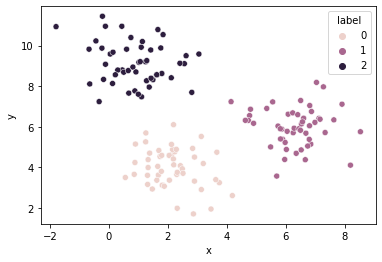

In [ ]:
sns.scatterplot(x='x', y='y', hue='label', data=df)

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

Text(42.0, 0.5, 'Truth')

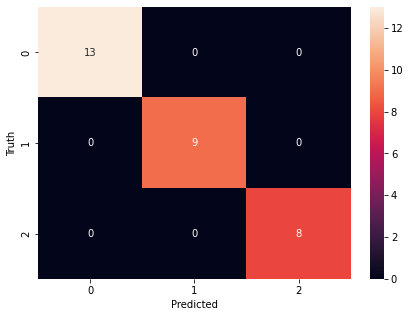

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
test_error_rates = []


for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train) 
   
    y_pred_test = knn.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

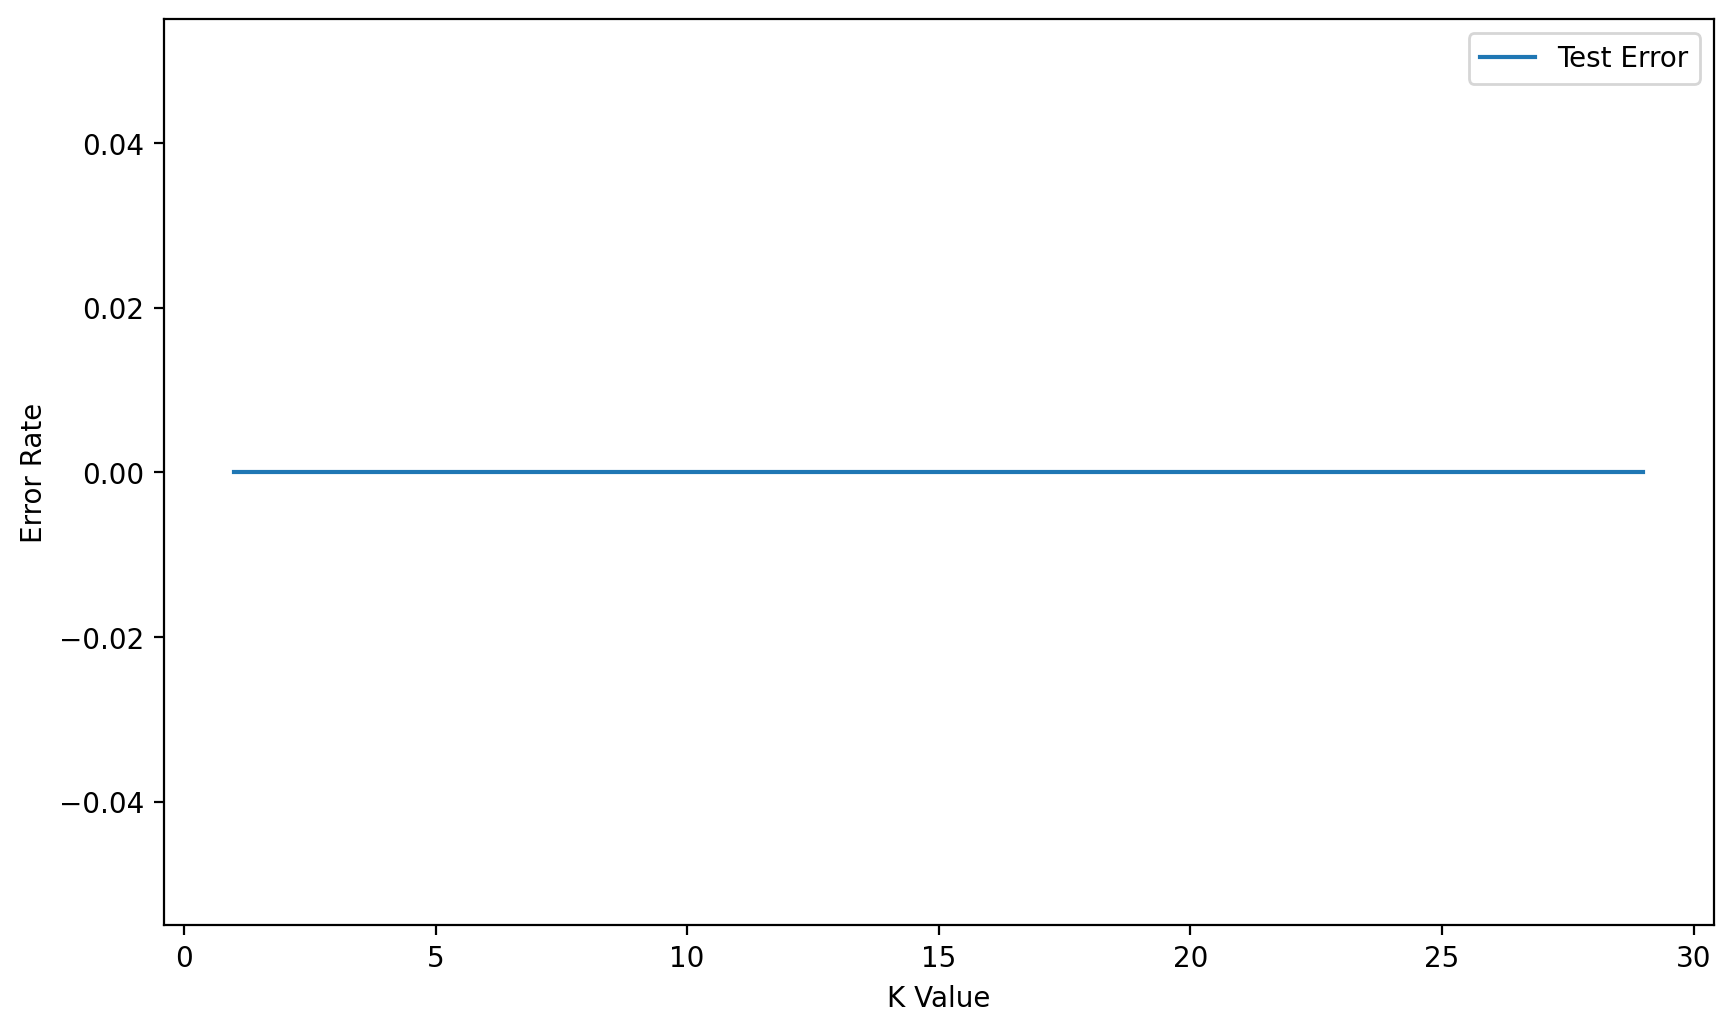

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [ ]:
knn2 = KNeighborsClassifier(algorithm='auto', 
                            leaf_size=30, 
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=5, 
                            weights='uniform')

In [ ]:
knn2.fit(X_train, y_train)


KNeighborsClassifier(n_jobs=1)

In [ ]:
knn2.score(X_test, y_test)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

Text(42.0, 0.5, 'Truth')

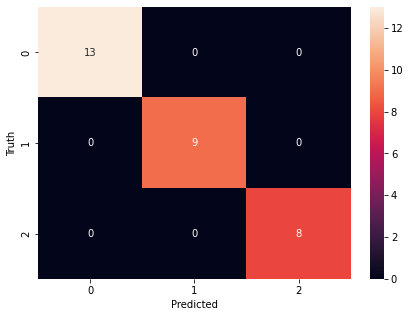

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

